In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit_aqua import Operator, run_algorithm
from qiskit_aqua.input import EnergyInput
from qiskit_aqua.translators.ising import maxcut, tsp
from qiskit_aqua.algorithms import VQE, ExactEigensolver
from qiskit_aqua.components.optimizers import SPSA
from qiskit_aqua.components.variational_forms import RY
from qiskit_aqua import QuantumInstance

# setup aqua logging
import logging
from qiskit_aqua import set_aqua_logging
# set_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [2]:
from qiskit import IBMQ
IBMQ.load_accounts()

distance
 [[ 0. 65. 71.]
 [65.  0. 22.]
 [71. 22.  0.]]


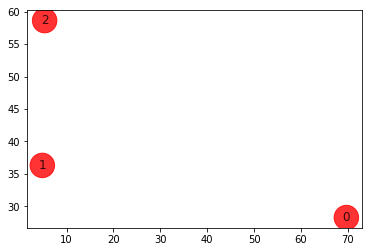

In [3]:
# Generating a graph of 3 nodes
n = 3
num_qubits = n ** 2
ins = tsp.random_tsp(n)
#print(ins)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['r' for node in G.nodes()]
pos = {k: v for k, v in enumerate(ins.coord)}
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
print('distance\n', ins.w)

In [4]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = G.copy()
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)

In [5]:
qubitOp, offset = tsp.get_tsp_qubitops(ins)
algo_input = EnergyInput(qubitOp)

energy: -600079.0
feasible: True
solution: [0, 1, 2]
solution objective: 158.0


/root/anaconda3/envs/qistwo/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


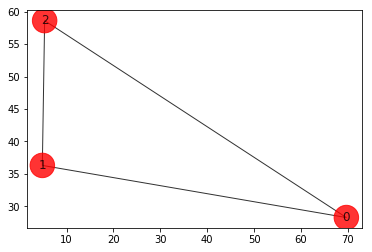

In [6]:
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = ExactEigensolver(qubitOp, k=1)
result = ee.run()

"""
algorithm_cfg = {
    'name': 'ExactEigensolver',
}

params = {
    'problem': {'name': 'ising'},
    'algorithm': algorithm_cfg
}
result = run_algorithm(params,algo_input)
"""
print('energy:', result['energy'])
#print('tsp objective:', result['energy'] + offset)
x = tsp.sample_most_likely(result['eigvecs'][0])
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

energy: -581493.5532476172
time: 109.8972270488739
feasible: True
solution: [1, 2, 0]
solution objective: 158.0


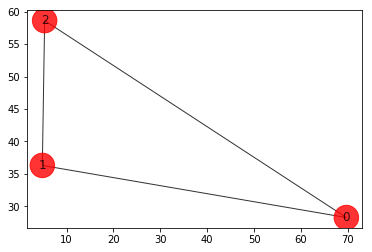

In [7]:
#VQE
eed = 10598
seed = 50

spsa = SPSA(max_trials=300)
ry = RY(qubitOp.num_qubits, depth=5, entanglement='linear')
vqe = VQE(qubitOp, ry, spsa, 'matrix')

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed=seed, seed_mapper=seed) #seed_transpiler=seed)

result = vqe.run(quantum_instance)
"""
algorithm_cfg = {
    'name': 'VQE',
    'operator_mode': 'matrix'
}

optimizer_cfg = {
    'name': 'SPSA',
    'max_trials': 300
}

var_form_cfg = {
    'name': 'RY',
    'depth': 5,
    'entanglement': 'linear'
}

params = {
    'problem': {'name': 'ising', 'random_seed': seed},
    'algorithm': algorithm_cfg,
    'optimizer': optimizer_cfg,
    'variational_form': var_form_cfg,
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'statevector_simulator'}
}
result = run_algorithm(parahms,algo_input)
"""
print('energy:', result['energy'])
print('time:', result['eval_time'])
#print('tsp objective:', result['energy'] + offset)
x = tsp.sample_most_likely(result['eigvecs'][0])
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

In [8]:
# VQE - run quantum algorithm with shots

#seed = 10598

#spsa = SPSA(max_trials=300)
#ry = RY(qubitOp.num_qubits, depth=5, entanglement='linear')
#vqe = VQE(qubitOp, ry, spsa, 'grouped_paulis', batch_mode=True)

#backend = Aer.get_backend('qasm_simulator')
#quantum_instance = QuantumInstance(backend=backend, shots=1024, seed=seed, seed_mapper=seed)

#result = vqe.run(quantum_instance)

"""update params in the previous cell
params['algorithm']['operator_mode'] = 'grouped_paulis'
params['backend']['name'] = 'qasm_simulator'
params['backend']['shots'] = 1024
result = run_algorithm(params,algo_input)
"""
#print('energy:', result['energy'])
#print('time:', result['eval_time'])
##print('tsp objective:', result['energy'] + offset)
#x = tsp.sample_most_likely(result['eigvecs'][0])
#print('feasible:', tsp.tsp_feasible(x))
#z = tsp.get_tsp_solution(x)
#print('solution:', z)
#print('solution objective:', tsp.tsp_value(z, ins.w))
#plot_histogram(result['eigvecs'][0])
#draw_tsp_solution(G, z, colors, pos)
print('\n...something here - too long processing time ...')


...something here - too long processing time ...
